<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Testando-abertura-dos-arquivos" data-toc-modified-id="Testando-abertura-dos-arquivos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Testando abertura dos arquivos</a></span></li><li><span><a href="#Definindo-funções-para-ajudar-na-hora-do-plot" data-toc-modified-id="Definindo-funções-para-ajudar-na-hora-do-plot-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Definindo funções para ajudar na hora do plot</a></span><ul class="toc-item"><li><span><a href="#Tentando-utilizar-um-mapa-de-cor" data-toc-modified-id="Tentando-utilizar-um-mapa-de-cor-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Tentando utilizar um mapa de cor</a></span></li></ul></li><li><span><a href="#Início-dos-plots" data-toc-modified-id="Início-dos-plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Início dos plots</a></span><ul class="toc-item"><li><span><a href="#Água---regiões-onde-foram-medidas-as-amostras-de-oscilatória" data-toc-modified-id="Água---regiões-onde-foram-medidas-as-amostras-de-oscilatória-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Água - regiões onde foram medidas as amostras de oscilatória</a></span></li><li><span><a href="#Água---juntando-RH-e-medidas" data-toc-modified-id="Água---juntando-RH-e-medidas-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Água - juntando RH e medidas</a></span></li><li><span><a href="#Água---regiões-do-RH" data-toc-modified-id="Água---regiões-do-RH-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Água - regiões do RH</a></span></li><li><span><a href="#Sacarose-e-glicerina" data-toc-modified-id="Sacarose-e-glicerina-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Sacarose e glicerina</a></span></li><li><span><a href="#1,3BD-e-DMSO" data-toc-modified-id="1,3BD-e-DMSO-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>1,3BD e DMSO</a></span><ul class="toc-item"><li><span><a href="#Em-etapas" data-toc-modified-id="Em-etapas-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Em etapas</a></span></li></ul></li><li><span><a href="#Ureia" data-toc-modified-id="Ureia-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Ureia</a></span><ul class="toc-item"><li><span><a href="#Em-etapas" data-toc-modified-id="Em-etapas-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Em etapas</a></span></li></ul></li><li><span><a href="#Sacarose-50%-e-Glicerina-60%" data-toc-modified-id="Sacarose-50%-e-Glicerina-60%-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Sacarose 50% e Glicerina 60%</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import locale
locale.setlocale(locale.LC_ALL, '')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})
mpl.rcParams.update({'mathtext.fontset':'dejavusans'})
mpl.rcParams['axes.formatter.use_locale'] = True

import numpy as np
import glob
import os

# Testando abertura dos arquivos

In [2]:
files = glob.glob('*txt')
files

['0pAdit.txt',
 '0pAdit2.txt',
 '15pBD.txt',
 '15pDMSO.txt',
 '15pUreia.txt',
 '20pGlic.txt',
 '25pBD.txt',
 '25pDMSO.txt',
 '30pGlic.txt',
 '30pUreia.txt',
 '45pGlic.txt',
 '50pSac.txt',
 '5pUreia.txt',
 '60pGlic.txt',
 'OHCA_pH7.txt',
 'OHCA_pH8.txt',
 'OHCA_pH9.txt']

In [3]:
def sort_files(string):
    return string.split('p')[1][0]

files.sort(key = sort_files)
files

['0pAdit.txt',
 '0pAdit2.txt',
 '15pBD.txt',
 '25pBD.txt',
 '15pDMSO.txt',
 '25pDMSO.txt',
 '20pGlic.txt',
 '30pGlic.txt',
 '45pGlic.txt',
 '60pGlic.txt',
 'OHCA_pH7.txt',
 'OHCA_pH8.txt',
 'OHCA_pH9.txt',
 '50pSac.txt',
 '15pUreia.txt',
 '30pUreia.txt',
 '5pUreia.txt']

# Definindo funções para ajudar na hora do plot

In [4]:
dict_nomes = {'Adit2':'Água', 
              'Adit':'Água', 
              'BD':'1,3BD', 
              'Sac':'Sacarose', 
              'DMSO':'DMSO', 
              'Ureia':'Ureia',
             'Glic':'Glicerina'}

dict_cores = {'Água':'C0',
             'Sacarose':'C1',
             'Glicerina':'C2',
              'DMSO':'C3',
              '1,3BD':'C4',
              'Ureia':'C5'}

def qual_simbolo(concentracao):
    if type(concentracao) == str:
        concentracao = int(concentracao)
    if concentracao == 0 or concentracao == 100:
        return 'o'
    elif 0 < concentracao < 20:
        return 's'
    elif 20 <= concentracao < 30:
        return 'd'
    elif 30 <= concentracao < 40:
        return '<'
    elif 40 <= concentracao < 50:
        return '>'
    elif 50 <= concentracao < 60:
        return 'v'
    elif 60 <= concentracao < 70:
        return '^'

# ---------------------------------------- #
# Definindo a partir de outro tipo de base #
# ---------------------------------------- #

dict_simbolos = {'Água':'o',
             'Sacarose':'s',
             'Glicerina':'<',
              'DMSO':'>',
              '1,3BD':'^',
              'Ureia':'v'}

def qual_cor(concentracao):
    if type(concentracao) == str:
        concentracao = int(concentracao)
    if concentracao == 0 or concentracao == 100:
        return '#ff0000'
    elif 0 < concentracao < 10:
        return '#ff8000'
    elif 10 <= concentracao < 20:
        return '#00b300'
    elif 20 <= concentracao < 30:
        return '#00bfff'
    elif 30 <= concentracao < 40:
        return '#0000ff'
    elif 40 <= concentracao < 50:
        return '#bf00ff'
    elif 50 <= concentracao < 60:
        return '#00aba9'
    elif 60 <= concentracao < 70:
        return 'C7'
    

## Tentando utilizar um mapa de cor

In [5]:
def qual_cor_cm(concentracao):
    if type(concentracao) == str:
        concentracao = int(concentracao)
    cm = plt.get_cmap('copper')
    #cm_subsection = np.linspace(0, 1, 100)
    return cm(concentracao/50)

qual_cor_cm(5)

(0.12110723794016547, 0.07658823529411765, 0.04877450980392157, 1.0)

# Início dos plots

## Água - regiões onde foram medidas as amostras de oscilatória

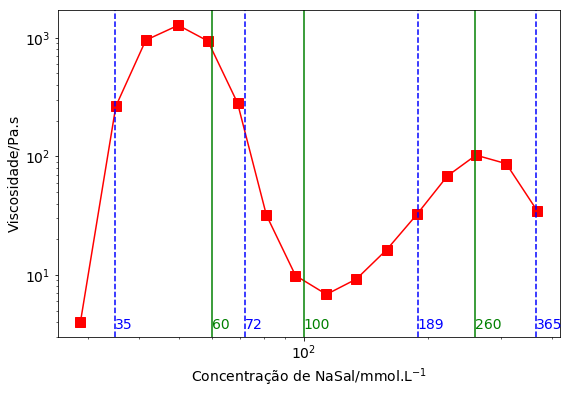

In [6]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

fig, ax = plt.subplots(1, 1, figsize=(9,6))

dados = [i for i in files if 'Sac' in i or 'Glic' in i or 'Adit2' in i]
#dados = [i for i in files if 'Glic' in i or 'Adit2' in i]

df = pd.read_csv('0pAdit2.txt', decimal=',', sep='\t', header=1)
ax.plot(df['Conc'], df['Eta'],
            marker='s', markersize=10,
            label='Água', color='r')

concs_agua = [35, 72, 189, 365]
concs_adit = [60, 100, 260]

for conc in concs_agua:
    ax.axvline(x=conc, color='b', linestyle='--')
    ax.text(x=conc, y=3.5, s=conc, color='b')
for conc in concs_adit:
    ax.axvline(x=conc, color='g')
    ax.text(x=conc, y=3.5, s=conc, color='g')

ax.set(xscale='log', yscale='log', xlabel='Concentração de NaSal/mmol.L$^{-1}$', ylabel='Viscosidade/Pa.s')
#ax.set_title('CTAB 100 mmol.L$^{-1}$', loc='right', fontsize='medium')

fig.savefig('../../../reologia/RH_agua_oscilatorio.pdf')

## Água - juntando RH e medidas

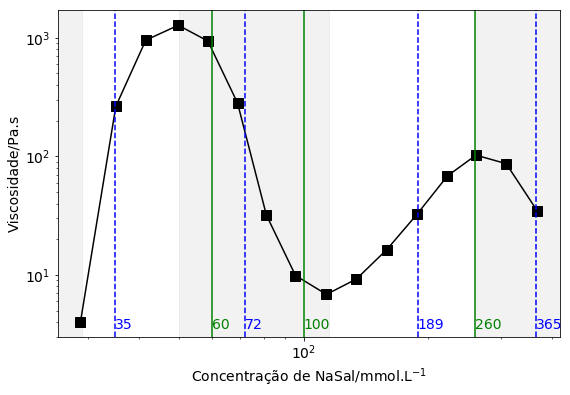

In [7]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

fig, ax = plt.subplots(1, 1, figsize=(9,6))

dados = [i for i in files if 'Sac' in i or 'Glic' in i or 'Adit2' in i]
#dados = [i for i in files if 'Glic' in i or 'Adit2' in i]

df = pd.read_csv('0pAdit2.txt', decimal=',', sep='\t', header=1)
ax.plot(df['Conc'], df['Eta'],
            marker='s', markersize=10,
            label='Água', color='k')

concs_agua = [35, 72, 189, 365]
concs_adit = [60, 100, 260]
regs = [28, 50, 115, 260]

for conc in concs_agua:
    ax.axvline(x=conc, color='b', linestyle='--')
    ax.text(x=conc, y=3.5, s=conc, color='b')
for conc in concs_adit:
    ax.axvline(x=conc, color='g')
    ax.text(x=conc, y=3.5, s=conc, color='g')

ax.set(xscale='log', yscale='log', xlabel='Concentração de NaSal/mmol.L$^{-1}$', ylabel='Viscosidade/Pa.s')

limsy = ax.get_ylim()
limsx = ax.get_xlim()

background_alpha = 0.05

ax.fill_between(x=[20, 29], y1=1, y2=2000, color='k', alpha=background_alpha)
ax.fill_between(x=[29, 50], y1=1, y2=2000, color='w', alpha=background_alpha)
ax.fill_between(x=[50, 115], y1=1, y2=2000, color='k', alpha=background_alpha)
ax.fill_between(x=[115, 260], y1=1, y2=2000, color='w', alpha=background_alpha)
ax.fill_between(x=[260, 500], y1=1, y2=2000, color='k', alpha=background_alpha)

ax.set_ylim(limsy)
ax.set_xlim(limsx)
#ax.set_title('CTAB 100 mmol.L$^{-1}$', loc='right', fontsize='medium')

fig.savefig('../../../reologia/RH_agua_oscilatorio.pdf')

## Água - regiões do RH

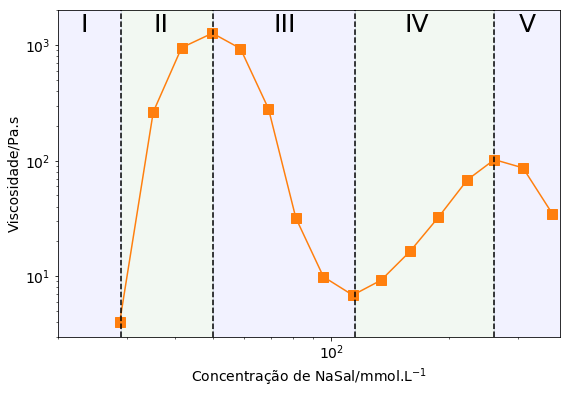

In [8]:
%matplotlib inline
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

#%matplotlib nbagg
fig, ax = plt.subplots(1, 1, figsize=(9,6))

dados = [i for i in files if 'Sac' in i or 'Glic' in i or 'Adit2' in i]
#dados = [i for i in files if 'Glic' in i or 'Adit2' in i]

df = pd.read_csv('0pAdit2.txt', decimal=',', sep='\t', header=1)
ax.plot(df['Conc'], df['Eta'],
            marker='s', markersize=10,
            label='Água', color='C1')

concs_agua = [29, 50, 115, 260]
pos_regs = [23.43, 36.71, 76.08, 165.8, 318]
pos_labels = ['I', 'II', 'III', 'IV', 'V']
pos_labels.reverse()

ax.set_xlim(left=20)
ax.set_ylim((3, 2000))

for conc in concs_agua:
    ax.axvline(x=conc, color='k', linestyle='--')
    
for pos in pos_regs:
    ax.text(x=pos, y=1300, s=pos_labels.pop(), color='k', fontsize=25, ha='center')

ax.set(xscale='log', yscale='log', xlabel='Concentração de NaSal/mmol.L$^{-1}$', ylabel='Viscosidade/Pa.s')

limsy = ax.get_ylim()
limsx = ax.get_xlim()

background_alpha = 0.05

ax.fill_between(x=[20, 29], y1=1, y2=2000, color='b', alpha=background_alpha)
ax.fill_between(x=[29, 50], y1=1, y2=2000, color='g', alpha=background_alpha)
ax.fill_between(x=[50, 115], y1=1, y2=2000, color='b', alpha=background_alpha)
ax.fill_between(x=[115, 260], y1=1, y2=2000, color='g', alpha=background_alpha)
ax.fill_between(x=[260, 500], y1=1, y2=2000, color='b', alpha=background_alpha)

ax.set_ylim(limsy)
ax.set_xlim(limsx)


#ax.set_title('CTAB 100 mmol.L$^{-1}$', loc='right', fontsize='medium')

fig.savefig('../../../reologia/regioes_RH.pdf')

## Sacarose e glicerina

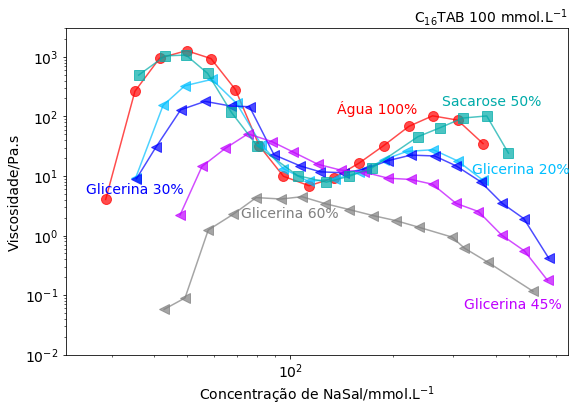

In [9]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

fig, ax = plt.subplots(1, 1, figsize=(9,6))

dados = [i for i in files if 'Sac' in i or 'Glic' in i or 'Adit2' in i]
posicoes = {
    'Sacarose 50%':(390, 150),
    'Água 100%':(180, 110),
    'Glicerina 20%':(475, 11),
    'Glicerina 45%':(450, 0.06),
    'Glicerina 60%':(100, 2),
    'Glicerina 30%':(35, 5)
}
#dados = [i for i in files if 'Glic' in i or 'Adit2' in i]

for i, file in enumerate(dados):
    conc = file.split('p')[0]
    if conc == '0':
        conc = '100'
    comp = dict_nomes[file.split('p')[1][:-4]]
    nome = f'{comp} {conc}%'
    
    df = pd.read_csv(file, decimal=',', sep='\t', header=1)
    ax.plot(df['Conc'], df['Eta'],  #, yerr=df['Erro'], capsize=3,
                 marker=dict_simbolos[comp], markersize=10,
                label=nome, color=qual_cor(conc), alpha=0.7)
    
    ax.text(x = posicoes[nome][0], y = posicoes[nome][1], s = nome, color=qual_cor(conc), ha='center', va='baseline')
    ax.set_xlim(22, 650)
    ax.set_ylim(1E-2, 3000)
    
    ax.set(xscale='log', yscale='log', xlabel='Concentração de NaSal/mmol.L$^{-1}$', ylabel='Viscosidade/Pa.s')
    ax.set_title('C$_{16}$TAB 100 mmol.L$^{-1}$', loc='right', fontsize='medium')
    #fig.savefig(f'../../../../Apresentação/RH_sacarose_glicerina{i}.png', dpi=150)
    
    
fig.savefig('../../../reologia/RH_sacarose_glicerina.pdf')


#ax.legend(ncol=2)



## 1,3BD e DMSO

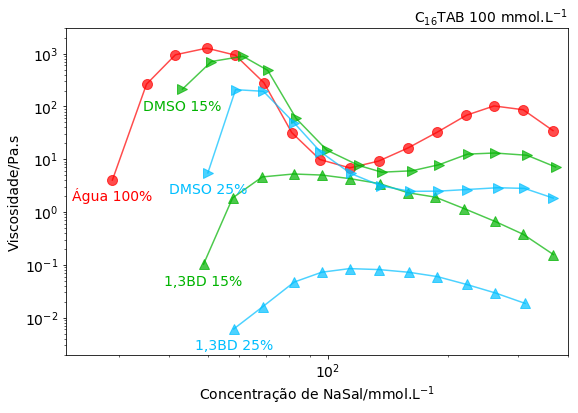

In [11]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

fig, ax = plt.subplots(1, 1, figsize=(9,6))

dados = [i for i in files if 'BD' in i or 'DMSO' in i or 'Adit2' in i]

for file in dados:
    conc = file.split('p')[0]
    if conc == '0':
        conc = '100'
    comp = dict_nomes[file.split('p')[1][:-4]]
    nome = f'{comp} {conc}%'
    
    df = pd.read_csv(file, decimal=',', sep='\t', header=1)
    ax.plot(df['Conc'], df['Eta'],  #, yerr=df['Erro'], capsize=3,
                 marker=dict_simbolos[comp], markersize=10,
                label=nome, color=qual_cor(conc), alpha=0.7)
    
    ax.text(x = df['Conc'][0], y = df['Eta'][0] / 2.5, s = nome, color=qual_cor(conc), ha='center', va='baseline')
    ax.set_xlim(22, 400)
    ax.set_ylim(2E-3, 3000)
    
ax.set(xscale='log', yscale='log', xlabel='Concentração de NaSal/mmol.L$^{-1}$', ylabel='Viscosidade/Pa.s')
ax.set_title('C$_{16}$TAB 100 mmol.L$^{-1}$', loc='right', fontsize='medium')
#ax.legend(ncol=2, fontsize='small')
fig.savefig(r'../../../reologia/RH_13BD_DMSO.pdf')

### Em etapas

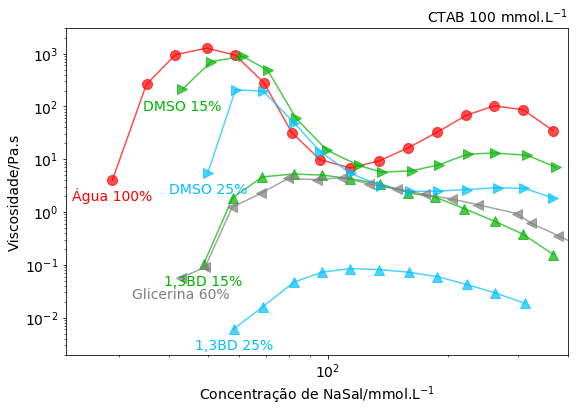

In [24]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

fig, ax = plt.subplots(1, 1, figsize=(9,6))

dados = [i for i in files if 'BD' in i or 'DMSO' in i or 'Adit2' in i or '60pGlic' in i]

for i, file in enumerate(dados):
    conc = file.split('p')[0]
    if conc == '0':
        conc = '100'
    comp = dict_nomes[file.split('p')[1][:-4]]
    nome = f'{comp} {conc}%'
    
    df = pd.read_csv(file, decimal=',', sep='\t', header=1)
    ax.plot(df['Conc'], df['Eta'],  #, yerr=df['Erro'], capsize=3,
                 marker=dict_simbolos[comp], markersize=10,
                label=nome, color=qual_cor(conc), alpha=0.7)
    
    ax.text(x = df['Conc'][0], y = df['Eta'][0] / 2.5, s = nome, color=qual_cor(conc), ha='center', va='baseline')
    ax.set_xlim(22, 400)
    ax.set_ylim(2E-3, 3000)
    ax.set(xscale='log', yscale='log', xlabel='Concentração de NaSal/mmol.L$^{-1}$', ylabel='Viscosidade/Pa.s')
    ax.set_title('CTAB 100 mmol.L$^{-1}$', loc='right', fontsize='medium')
    
    fig.savefig(f'../../../../Apresentação/RH_dmso_13bd{i}.png', dpi=150)
    

#ax.legend(ncol=2, fontsize='small')
#fig.savefig('RH_13BD_DMSO.pdf')

## Ureia

Adit2
Ureia
Ureia
Ureia


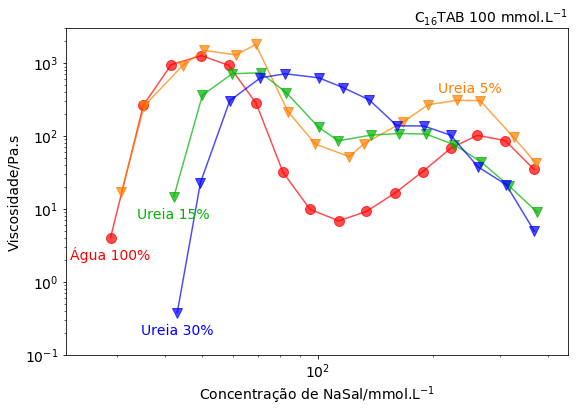

In [15]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

fig, ax = plt.subplots(1, 1, figsize=(9,6))

dados = [i for i in files if 'Ur' in i or 'Adit2' in i]
dados.sort(key = lambda x: int(x.split('p')[0]))

for file in dados:
    conc = file.split('p')[0]
    if conc == '0':
        conc = '100'
    print(file.split('p')[1][:-4])
    comp = dict_nomes[file.split('p')[1][:-4]]
    nome = f'{comp} {conc}%'
    
    df = pd.read_csv(file, decimal=',', sep='\t', header=1)
    ax.plot(df['Conc'], df['Eta'],  #, yerr=df['Erro'], capsize=3,
                 marker=dict_simbolos[comp], markersize=10,
                label=nome, color=qual_cor(conc), alpha=0.7)
    
    if conc == '5':
        textpos_x = 250
        textpos_y = 400
    else:
        textpos_x = df['Conc'][0]
        textpos_y = df['Eta'][0] / 2
    
    ax.text(x = textpos_x, y = textpos_y, s = nome, color=qual_cor(conc), ha='center', va='baseline')
    ax.set_xlim(22, 450)
    ax.set_ylim(0.1, 3000)

ax.set(xscale='log', yscale='log', xlabel='Concentração de NaSal/mmol.L$^{-1}$', ylabel='Viscosidade/Pa.s')
ax.set_title('C$_{16}$TAB 100 mmol.L$^{-1}$', loc='right', fontsize='medium')
#ax.legend()
fig.savefig(r'../../../reologia/RH_ureia.pdf')

### Em etapas

Adit2
Ureia
Ureia
Ureia


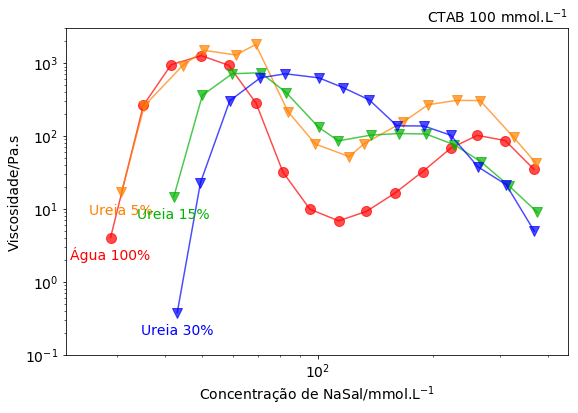

In [26]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

fig, ax = plt.subplots(1, 1, figsize=(9,6))

dados = [i for i in files if 'Ur' in i or 'Adit2' in i]
dados.sort(key = lambda x: int(x.split('p')[0]))

for i, file in enumerate(dados):
    conc = file.split('p')[0]
    if conc == '0':
        conc = '100'
    print(file.split('p')[1][:-4])
    comp = dict_nomes[file.split('p')[1][:-4]]
    nome = f'{comp} {conc}%'
    
    df = pd.read_csv(file, decimal=',', sep='\t', header=1)
    ax.plot(df['Conc'], df['Eta'],  #, yerr=df['Erro'], capsize=3,
                 marker=dict_simbolos[comp], markersize=10,
                label=nome, color=qual_cor(conc), alpha=0.7)
    
    ax.text(x = df['Conc'][0], y = df['Eta'][0] / 2, s = nome, color=qual_cor(conc), ha='center', va='baseline')
    ax.set_xlim(22, 450)
    ax.set_ylim(0.1, 3000)
    ax.set(xscale='log', yscale='log', xlabel='Concentração de NaSal/mmol.L$^{-1}$', ylabel='Viscosidade/Pa.s')
    ax.set_title('CTAB 100 mmol.L$^{-1}$', loc='right', fontsize='medium')

    fig.savefig(f'../../../../Apresentação/RH_ureia{i}.png', dpi=150)



## Sacarose 50% e Glicerina 60%

Adit2
Glic
Sac


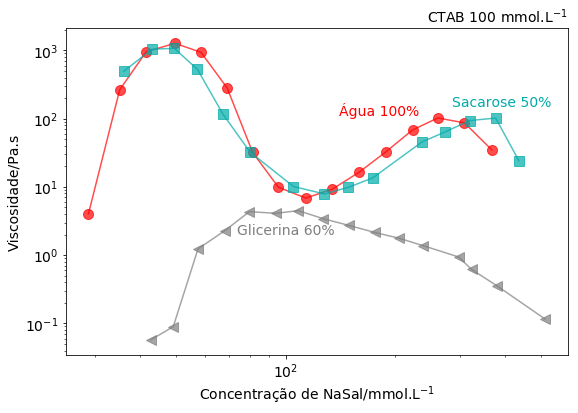

In [31]:
dados = ['0pAdit2.txt',  '60pGlic.txt', '50pSac.txt']

mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

posicoes = {
    'Sacarose 50%':(390, 150),
    'Água 100%':(180, 110),
    'Glicerina 20%':(475, 11),
    'Glicerina 45%':(450, 0.06),
    'Glicerina 60%':(100, 2),
    'Glicerina 30%':(35, 5)
}

fig, ax = plt.subplots(1, 1, figsize=(9,6))

for i, file in enumerate(dados):
    conc = file.split('p')[0]
    if conc == '0':
        conc = '100'
    print(file.split('p')[1][:-4])
    comp = dict_nomes[file.split('p')[1][:-4]]
    nome = f'{comp} {conc}%'
    
    df = pd.read_csv(file, decimal=',', sep='\t', header=1)
    ax.plot(df['Conc'], df['Eta'],  #, yerr=df['Erro'], capsize=3,
                 marker=dict_simbolos[comp], markersize=10,
                label=nome, color=qual_cor(conc), alpha=0.7)
    
    ax.text(x = posicoes[nome][0], y = posicoes[nome][1], s = nome, color=qual_cor(conc), ha='center', va='baseline')
    #ax.set_xlim(22, 450)
    #ax.set_ylim(0.1, 3000)
    ax.set(xscale='log', yscale='log', xlabel='Concentração de NaSal/mmol.L$^{-1}$', ylabel='Viscosidade/Pa.s')
    ax.set_title('CTAB 100 mmol.L$^{-1}$', loc='right', fontsize='medium')

    
fig.savefig(f'../../../../Apresentação/RH_sac50_glic60{i}.png', dpi=150)

